In [2]:
%matplotlib inline

import os
import matplotlib
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
base_dir = 'cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [4]:
def display_augmentation(datagen):
    fnames = [os.path.join(train_cats_dir, fname)
              for fname in os.listdir(train_cats_dir)]

    img_path = fnames[3]
    img = image.load_img(img_path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)

    i = 0
    for batch in datagen.flow(x, batch_size=1):
        plt.figure(i)
        imgplot = plt.imshow(image.array_to_img(batch[0]))
        i += 1
        if i % 4 == 0:
            break

    plt.show()


def plot_loss(loss_values, val_loss_values):
    epochs = range(1, len(loss_values) + 1)

    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()


def plot_accuracy(acc, val_acc):
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

In [5]:
if __name__ == "__main__":

    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu',
            input_shape=(150, 150, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.summary()

    model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=1e-4),
                metrics=['acc'])

    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,)

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

    validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

    history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=50
    )

    model.save('cats_and_dogs_small_2.h5')

    # model.load_weights('cats_and_dogs_small_2.h5')
    # loss, acc = model.evaluate_generator(test_generator, steps=50)
    # print(acc)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxP

100/100 [==============================] - 25s 249ms/step - loss: 0.4564 - acc: 0.7772 - val_loss: 0.4756 - val_acc: 0.7779
Epoch 40/100
100/100 [==============================] - 25s 250ms/step - loss: 0.4632 - acc: 0.7794 - val_loss: 0.4391 - val_acc: 0.8061
Epoch 41/100
100/100 [==============================] - 25s 252ms/step - loss: 0.4533 - acc: 0.7881 - val_loss: 0.4566 - val_acc: 0.7893
Epoch 42/100
100/100 [==============================] - 25s 254ms/step - loss: 0.4550 - acc: 0.7844 - val_loss: 0.4763 - val_acc: 0.7633
Epoch 43/100
100/100 [==============================] - 26s 262ms/step - loss: 0.4388 - acc: 0.7950 - val_loss: 0.4841 - val_acc: 0.7642
Epoch 44/100
100/100 [==============================] - 25s 253ms/step - loss: 0.4415 - acc: 0.7875 - val_loss: 0.4743 - val_acc: 0.7938
Epoch 45/100
100/100 [==============================] - 26s 262ms/step - loss: 0.4498 - acc: 0.7872 - val_loss: 0.5151 - val_acc: 0.7680
Epoch 46/100
100/100 [==============================] 

Epoch 99/100
100/100 [==============================] - 25s 251ms/step - loss: 0.3265 - acc: 0.8597 - val_loss: 0.4602 - val_acc: 0.8268
Epoch 100/100
100/100 [==============================] - 25s 255ms/step - loss: 0.3361 - acc: 0.8534 - val_loss: 0.4387 - val_acc: 0.8177


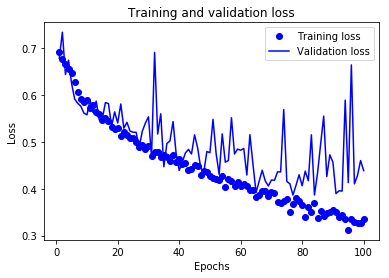

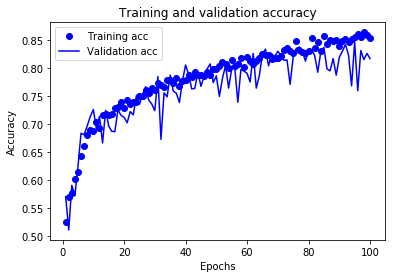

In [6]:
    history_dict = history.history
    plot_loss(history_dict['loss'], history_dict['val_loss'])
    plt.clf()
    plot_accuracy(history_dict['acc'], history_dict['val_acc'])